385.3091654923541 -1.3869344875257976


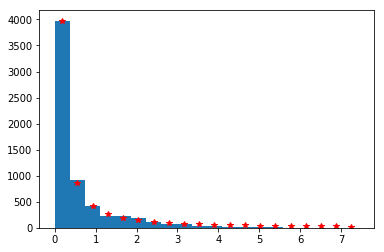

In [3]:
fp=open('Alice.txt','r',encoding='UTF-8')
line=fp.readline()
count=dict()
while line:
   
    line=fp.readline()
    s=line.split()
    for word in s:
        if word in count:
            count[word] += 1
        else:
            count[word] = 1

import matplotlib.pyplot as plt
import numpy as np
num=[]
for key in count:
    num.append(count[key])

num.sort()
num.reverse()
lognum=np.log(num)
a=plt.hist(lognum,bins=20)


dx=(a[1][1]-a[1][0])
bin_center=np.array(a[1][0:-1])+dx/2


from scipy import optimize
def test_func(x,amp,alpha):
    return amp*x**alpha

params,params_covariance=optimize.curve_fit(test_func,bin_center,a[0])
plt.plot(bin_center,test_func(bin_center,params[0],params[1]),'r*',label='Fitted Function')
print(params[0],params[1])
plt.show()

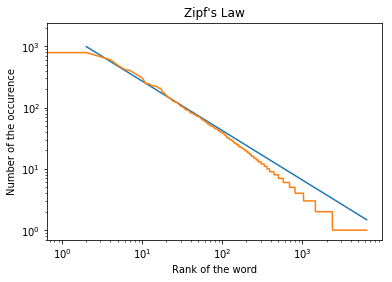

the fitting equation is y=1738.62(x^-0.81)
the covariences for these two parameters are: [[ 1.53537e+01 -2.84000e-03]
 [-2.84000e-03  0.00000e+00]]


In [12]:
fp = open('Alice.txt','r',encoding='UTF-8')
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
line = fp.readline()
my_dict={}
#read the first line from the title

def func(k,amp,alpha):
    return amp*(k**alpha)

while line:
    s=line.split()
    for x in s:
        if x not in my_dict:
            my_dict[x]=1
        else:
            my_dict[x]+=1  
    line = fp.readline()
    
fp.close()

num=[]
for key in my_dict:
    num.append(my_dict[key])
    
num.sort()
num.reverse()

q=range(1,len(num)+1)
popt,pcov=curve_fit(func,q,num,maxfev=800)

K=np.linspace(q[1],q[-1],10000)
plt.plot(K,func(K,*popt))
plt.loglog(range(len(num)),num)
plt.xlabel('Rank of the word')
plt.ylabel('Number of the occurence')
plt.title("Zipf's Law")
plt.show()
print('the fitting equation is y='+str('%.2f'%popt[0])+'(x^'+str('%.2f'%popt[1])+')')
print('the covariences for these two parameters are: '+str(np.around(pcov,5)))